In [17]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt


sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

### Settings

In [18]:
BASE_PATH = "../notebooks/dataframes/"
SPEED_BENCH_PATH = "/home/emerge/gpudrive/examples/benchmarks/results/"
WINDOW = 10
ALPHA = 0.25
MARKERSIZE = 12

# COLORS
GPUDRIVE_COLOR = "magenta"
NOCTURNE_COLOR = "#2952a3"
NOCTURNE_PUFFERLIB_COLOR = "#5983d5"
WAYMAX_COLOR = "#339966"
OPTIM_PERF_COLOR = "#40bf80"

## Performance vs. global step and wallclock time 

- GPUDrive is X times faster than Nocturne -- Ceteris paribus 

In [13]:
df_wallclock_nocturne

,metrics/wallclock_time (s),selected_nocturne_07_11_05_08 - _step,selected_nocturne_07_11_05_08 - _step__MIN,selected_nocturne_07_11_05_08 - _step__MAX,selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved,selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved__MIN,selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved__MAX,selected_nocturne_07_09_04_59 - _step,selected_nocturne_07_09_04_59 - _step__MIN,selected_nocturne_07_09_04_59 - _step__MAX,selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved,selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved__MIN,selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved__MAX,selected_nocturne_07_08_12_31 - _step,selected_nocturne_07_08_12_31 - _step__MIN,selected_nocturne_07_08_12_31 - _step__MAX,selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved,selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved__MIN,selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved__MAX
0,15.492797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,13.355049,13.355049,13.355049
1,17.171305,0.0,0.0,0.0,13.829787,13.829787,13.829787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.083866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,19.929453,19.929453,19.929453
3,45.007912,1.0,1.0,1.0,21.528662,21.528662,21.528662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66.273666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,23.395149,23.395149,23.395149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,55934.585938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1349.0,1349.0,1349.0,95.709572,95.709572,95.709572
2801,56048.328125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,1350.0,1350.0,94.982498,94.982498,94.982498
2802,56182.203125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1351.0,1351.0,1351.0,94.905212,94.905212,94.905212
2803,56318.335938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352.0,1352.0,1352.0,95.667870,95.667870,95.667870


In [27]:
df_global_step_nocturne

,global_step,selected_nocturne_07_11_05_08 - _step,selected_nocturne_07_11_05_08 - _step__MIN,selected_nocturne_07_11_05_08 - _step__MAX,selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved,selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved__MIN,selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved__MAX,selected_nocturne_07_09_04_59 - _step,selected_nocturne_07_09_04_59 - _step__MIN,selected_nocturne_07_09_04_59 - _step__MAX,selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved,selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved__MIN,selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved__MAX,selected_nocturne_07_08_12_31 - _step,selected_nocturne_07_08_12_31 - _step__MIN,selected_nocturne_07_08_12_31 - _step__MAX,selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved,selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved__MIN,selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved__MAX
0,12898,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,13.355049,13.355049,13.355049,0.0,0.0,0.0,13.355049,13.355049,13.355049
1,15612,0.0,0.0,0.0,13.829787,13.829787,13.829787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25458,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,18.181818,18.181818,18.181818,NaN,NaN,NaN,NaN,NaN,NaN
3,25870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,19.929453,19.929453,19.929453
4,32166,1.0,1.0,1.0,21.528662,21.528662,21.528662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,26831510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1349.0,1349.0,1349.0,95.709572,95.709572,95.709572
2800,26851869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,1350.0,1350.0,94.982498,94.982498,94.982498
2801,26872355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1351.0,1351.0,1351.0,94.905212,94.905212,94.905212
2802,26892869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352.0,1352.0,1352.0,95.667870,95.667870,95.667870


In [30]:
df_wallclock_nocturne = pd.read_csv(f"{BASE_PATH}nocturne_wallclock.csv")
df_global_step_nocturne = pd.read_csv(f"{BASE_PATH}nocturne_global_step.csv")

# Define the list of columns to select
columns_to_select_1 = [
    'metrics/wallclock_time (s)',
    'selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved',
    'selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved',
    'selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved'
]

# Define the list of columns to select
columns_to_select_2 = [
    'global_step',
    'selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved',
    'selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved',
    'selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved'
]

# Select the specified columns from the DataFrame
df_wallclock_nocturne_selected = df_wallclock_nocturne[columns_to_select_1]
df_global_step_nocturne_selected = df_global_step_nocturne[columns_to_select_2]

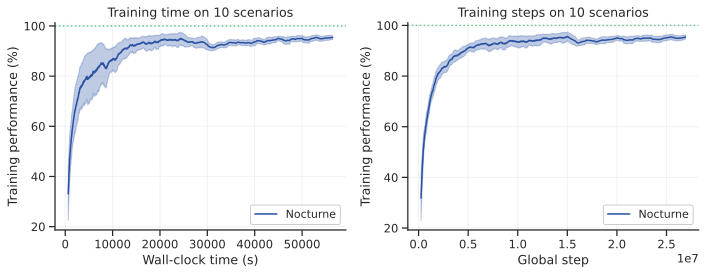

In [47]:
# Create a "Performance [%]" column averaging over the three selected performance metrics
df_wallclock_nocturne_selected['Performance [%]'] = df_wallclock_nocturne_selected[
    [
        'selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved',
        'selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved',
        'selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved'
    ]
].mean(axis=1)

df_global_step_nocturne_selected['Performance [%]'] = df_global_step_nocturne_selected[
    [
        'selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved',
        'selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved',
        'selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved'
    ]
].mean(axis=1)

# Define the rolling average window size (e.g., 50 steps)
window_size = 50
df_wallclock_nocturne_selected['Rolling Mean'] = df_wallclock_nocturne_selected['Performance [%]'].rolling(window=window_size).mean()
df_wallclock_nocturne_selected['Rolling Std'] = df_wallclock_nocturne_selected['Performance [%]'].rolling(window=window_size).std()

df_global_step_nocturne_selected['Rolling Mean'] = df_global_step_nocturne_selected['Performance [%]'].rolling(window=window_size).mean()
df_global_step_nocturne_selected['Rolling Std'] = df_global_step_nocturne_selected['Performance [%]'].rolling(window=window_size).std()

# Create the figure
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=False)

# First subplot: Wallclock time vs Performance with rolling mean and standard deviation
axs[0].set_title('Training time on 10 scenarios')
sns.lineplot(
    data=df_wallclock_nocturne_selected, x='metrics/wallclock_time (s)', y='Rolling Mean',
    color=NOCTURNE_COLOR, ax=axs[0], label='Nocturne'
)
axs[0].fill_between(
    df_wallclock_nocturne_selected['metrics/wallclock_time (s)'],
    df_wallclock_nocturne_selected['Rolling Mean'] - df_wallclock_nocturne_selected['Rolling Std'],
    df_wallclock_nocturne_selected['Rolling Mean'] + df_wallclock_nocturne_selected['Rolling Std'],
    color=NOCTURNE_COLOR, alpha=0.3, 
)
axs[0].axhline(y=100, color=OPTIM_PERF_COLOR, linestyle='dotted', alpha=0.8)
axs[0].set_xlabel('Wall-clock time (s)')
axs[0].set_ylabel('Training performance (%)')

# Second subplot: Global step vs Performance with rolling mean and standard deviation
axs[1].set_title('Training steps on 10 scenarios')
sns.lineplot(
    data=df_global_step_nocturne_selected, x='global_step', y='Rolling Mean',
    color=NOCTURNE_COLOR, ax=axs[1], label='Nocturne'
)
axs[1].fill_between(
    df_global_step_nocturne_selected['global_step'],
    df_global_step_nocturne_selected['Rolling Mean'] - df_global_step_nocturne_selected['Rolling Std'],
    df_global_step_nocturne_selected['Rolling Mean'] + df_global_step_nocturne_selected['Rolling Std'],
    color=NOCTURNE_COLOR, alpha=0.3,
)
axs[1].axhline(y=100, color=OPTIM_PERF_COLOR, linestyle='dotted', alpha=0.8)
axs[1].set_xlabel('Global step')
axs[1].set_ylabel('Training performance (%)')

# Final adjustments and saving the figure
for ax in axs:
    ax.grid(True, alpha=ALPHA)
    ax.legend(facecolor='white', framealpha=1, fontsize=11)

plt.tight_layout()
sns.despine()
plt.savefig('training_speedup.pdf', bbox_inches="tight")


In [31]:
df_global_step_nocturne_selected

,global_step,selected_nocturne_07_11_05_08 - metrics/perc_goal_achieved,selected_nocturne_07_09_04_59 - metrics/perc_goal_achieved,selected_nocturne_07_08_12_31 - metrics/perc_goal_achieved
0,12898,NaN,13.355049,13.355049
1,15612,13.829787,NaN,NaN
2,25458,NaN,18.181818,NaN
3,25870,NaN,NaN,19.929453
4,32166,21.528662,NaN,NaN
...,...,...,...,...
2799,26831510,NaN,NaN,95.709572
2800,26851869,NaN,NaN,94.982498
2801,26872355,NaN,NaN,94.905212
2802,26892869,NaN,NaN,95.667870


In [ ]:
df_goal_wallclock = pd.read_csv(f"{BASE_PATH}wallclock_vs_perc_goal_achieved.csv")

df_goal_wallclock = df_goal_wallclock[[
    "metrics/wallclock_time (s)", 
    "BEST_nocturne_07_08_12_31 - metrics/perc_goal_achieved",
    "BEST_gpudrive_07_08_11_35 - metrics/perc_goal_achieved",
    ]
]

df_goal_wallclock.columns = [
    "Wallclock time (s)",
    "nocturne",
    "gpudrive",
]

df_goal_wallclock['nocturne_smooth'] = df_goal_wallclock['nocturne'].rolling(window=WINDOW).mean()
df_goal_wallclock['gpudrive_smooth'] = df_goal_wallclock['gpudrive'].rolling(window=WINDOW).mean()

df_goal_step = pd.read_csv(f"{BASE_PATH}globalstep_vs_perc_goal_achieved.csv")
df_goal_step = df_goal_step[[
    "global_step", 
    "BEST_nocturne_07_08_12_31 - metrics/perc_goal_achieved",
    "BEST_gpudrive_07_08_11_35 - metrics/perc_goal_achieved",
    ]
]
df_goal_step.columns = [
    "Global step",
    "nocturne",
    "gpudrive",
]

df_goal_step['nocturne_smooth'] = df_goal_step['nocturne'].rolling(window=WINDOW).mean()
df_goal_step['gpudrive_smooth'] = df_goal_step['gpudrive'].rolling(window=WINDOW).mean()

df_goal_wallclock['Wallclock time (min)'] = df_goal_wallclock['Wallclock time (s)'] / 60

data = {
    "Wallclock time (s)": [39000, 970],
    "Simulator": ["Nocturne", "GPUDrive"]
}

# Create the dataframe
df_to_95 = pd.DataFrame(data)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3.5), sharex=False)

axs[0].set_title(r'Training $steps$ on 10 scenarios')
sns.lineplot(data=df_goal_step, x='Global step', y='nocturne', color=NOCTURNE_COLOR, label='Nocturne', ax=axs[0])
sns.lineplot(data=df_goal_step, x='Global step', y='gpudrive', color=GPUDRIVE_COLOR, label='GPUDrive', ax=axs[0])

axs[1].set_title(r'Training $time$ on 10 scenarios')
sns.lineplot(data=df_goal_wallclock, x='Wallclock time (s)', y='nocturne', color=NOCTURNE_COLOR, label='Nocturne', ax=axs[1])
sns.lineplot(data=df_goal_wallclock, x='Wallclock time (s)', y='gpudrive', color=GPUDRIVE_COLOR, label='GPUDrive', ax=axs[1])

# add horizontal line at 100
axs[0].axhline(y=100, color=OPTIM_PERF_COLOR, linestyle='dotted', alpha=0.8)
axs[1].axhline(y=100, color=OPTIM_PERF_COLOR, linestyle='dotted', alpha=0.8)

axs[0].set_xlabel('Global step')
axs[1].set_xlabel('Wall-clock time (s)')
axs[0].set_ylabel('Training \n performance (%)')
axs[1].set_ylabel('Training \n performance (%)')

# axs[1].set_xscale('log')
# axs[0].set_xscale('log')

axs[0].grid(True, alpha=ALPHA)
axs[1].grid(True, alpha=ALPHA)
axs[2].grid(True, alpha=ALPHA)

axs[0].legend(facecolor='white', framealpha=1, fontsize=11)
axs[1].legend(facecolor='white', framealpha=1, fontsize=11)

axs[2].set_title('Total time to 95% performance')
sns.barplot(data=df_to_95, y='Wallclock time (s)', x='Simulator', palette=[NOCTURNE_COLOR, GPUDRIVE_COLOR], ax=axs[2])
axs[2].set_yscale('log')
axs[2].set_ylabel('Wall-clock time (s)')

plt.tight_layout()
sns.despine()

plt.savefig(f'training_speedup.pdf', bbox_inches="tight")

### Raw simulator speed

In [5]:
#df_waymax_speed = pd.read_csv('/home/emerge/gpudrive/examples/benchmarks/results/waymax_speed_04_0944_wi_obs_a100.csv')

# Gpudrive
#df_gdrive_speed_a100 = pd.read_csv('/home/emerge/gpudrive/examples/benchmarks/results/gpudrive_speed_05_2117_a100.csv') # random-actors
#df_gdrive_speed_rtx = pd.read_csv('/home/emerge/gpudrive/examples/benchmarks/results/gpudrive_speed_05_1943_desktop.csv')

# df_gdrive_metadata = pd.read_csv('gpudrive_metadata_13_1133.csv')
#df_gdrive_speed = pd.concat([df_gdrive_speed_a100, df_gdrive_speed_rtx])

In [74]:
# New

# WAYMAX 
df_waymax_speed_w_obs = pd.read_csv('/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/waymax_speed_01_1838_with_obs.csv')
#df_waymax_speed_wo_obs = pd.read_csv('/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/waymax_speed_01_1811_wo_obs.csv')

df_waymax_speed = pd.concat([df_waymax_speed_w_obs])
df_waymax_speed['device_name'] = 'RTX 4080'

# GPU DRIVE
# Multi-file gpudrive speed benchmarks
df_gpudrive_speed_rtx_classic = pd.read_csv('/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/gpudrive_speed_01_1654.csv')
df_gpudrive_speed_rtx_lidar = pd.read_csv('/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/gpudrive_speed_01_1657.csv')

# a100
df_gpudrive_speed_a100_classic = pd.read_csv('/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/gpudrive_speed_01_1859.csv')
df_gpudrive_speed_a100_lidar = pd.read_csv('/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/gpudrive_speed_01_1837.csv')

df_gpudrive_speed_rtx_classic['obs_type'] = 'Radial filter'
df_gpudrive_speed_a100_classic['obs_type'] = 'Radial filter'
df_gpudrive_speed_rtx_lidar['obs_type'] = 'LiDAR'
df_gpudrive_speed_a100_lidar['obs_type'] = 'LiDAR'

df_obs_types= pd.concat([
    df_gpudrive_speed_rtx_classic, 
    df_gpudrive_speed_rtx_lidar, 
    df_gpudrive_speed_a100_classic,
    df_gpudrive_speed_a100_lidar
])

# rtx 
df_gdrive_speed = pd.concat([df_gpudrive_speed_rtx_classic, df_gpudrive_speed_a100_classic])
df_gpudrive_meta = pd.read_csv('/home/emerge/daphne/gpudrive/examples/benchmarks/dataframes/gpudrive_metadata_01_1654.csv')

In [75]:
df_obs_types[df_obs_types['batch_size (num envs)'] == 512]

,simulator,device_name,device_mem,actors,obs_type,batch_size (num envs),avg_time_per_reset (ms),avg_time_per_step (ms),all_agent_fps (throughput),val_agent_fps (goodput),total_steps,total_resets,tot_step_time (s),tot_reset_time (s),val_agent_frames,tot_agent_frames
8,GPU Drive,NVIDIA GeForce RTX 4080,16376.0,random,Radial filter,512,96.462330,28.637818,2.288443e+06,193380.658271,80.0,80.0,2.291025,7.716986,443040.0,5242880.0
8,GPU Drive,NVIDIA GeForce RTX 4080,16376.0,random,LiDAR,512,78.844818,10.263997,6.385037e+06,539555.869834,80.0,80.0,0.821120,6.307585,443040.0,5242880.0
8,GPU Drive,NVIDIA A100-SXM4-80GB,81920.0,random,Radial filter,512,157.539999,38.193306,1.715903e+06,146413.090088,80.0,80.0,3.055465,12.603200,447360.0,5242880.0
8,GPU Drive,NVIDIA A100-SXM4-80GB,81920.0,random,LiDAR,512,137.024811,15.878069,4.127454e+06,352183.874428,80.0,80.0,1.270246,10.961985,447360.0,5242880.0


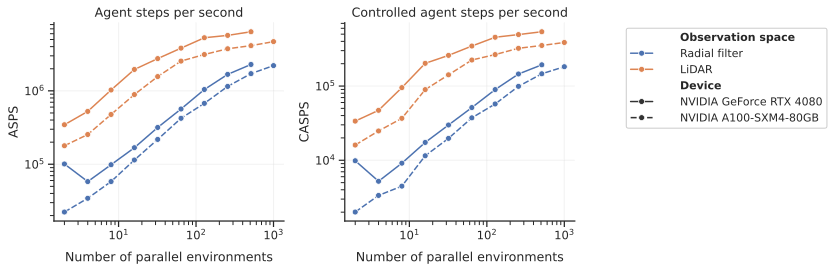

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

df_obs_types = df_obs_types.rename(columns={'device_name': 'Device', 'obs_type': 'Observation space'})

sns.lineplot(data=df_obs_types, x='batch_size (num envs)', y='val_agent_fps (goodput)', style='Device', hue='Observation space', marker='.', markersize=MARKERSIZE, legend=True, ax=axs[1])
axs[1].set_title('Controlled agent steps per second')
axs[0].grid(True, alpha=ALPHA)
axs[1].grid(True, alpha=ALPHA)
axs[0].set_xlabel('Number of parallel environments', labelpad=10)
axs[1].set_xlabel('Number of parallel environments', labelpad=10)
axs[1].set_ylabel('CASPS')
axs[0].set_ylabel('ASPS')

sns.lineplot(data=df_obs_types, x='batch_size (num envs)', y='all_agent_fps (throughput)', style='Device', hue='Observation space', marker='.', markersize=MARKERSIZE, legend=False, ax=axs[0])
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_title('Agent steps per second') # LiDAR

legend = axs[1].legend(facecolor='white', framealpha=1, fontsize=11, handletextpad=2.5, bbox_to_anchor=(1.2, 1))
for text in legend.get_texts():
    if text.get_text() in ["Device", "Observation space"]:
        text.set_fontweight('bold')

plt.tight_layout()
sns.despine()

plt.savefig(f'classic_vs_lidar_obs.pdf', bbox_inches="tight")

### Agent distributions

In [94]:
import ast 

agent_dist = np.array(ast.literal_eval(df_gpudrive_meta[df_gpudrive_meta['num_envs (BS)'] == 512]['num_valid_objects_per_scene (dist)'].tolist()[0]))

print(agent_dist.mean())
df_gpudrive_speed_rtx_classic['device_name'] = 'RTX 4080'
df_gpudrive_speed_a100_classic['device_name'] = 'A100'

df_gdrive_speed = pd.concat([df_gpudrive_speed_rtx_classic, df_gpudrive_speed_a100_classic])


df_all = pd.concat([df_waymax_speed, df_gdrive_speed])
df_all = df_all.reset_index(drop=True)
# Rename device_name to Device and simulator to Simulator
df_all = df_all.rename(columns={'device_name': 'Device', 'simulator': 'Simulator'})
df_all = df_all[df_all['batch_size (num envs)'] < 1000]

10.81640625


In [137]:
agent_dist.std()

9.284010762324705

In [115]:
df_gdrive_speed[df_gdrive_speed['batch_size (num envs)'] == 512][['all_agent_fps (throughput)', 'val_agent_fps (goodput)']]

,all_agent_fps (throughput),val_agent_fps (goodput)
8,2.288443e+06,193380.658271
8,1.715903e+06,146413.090088


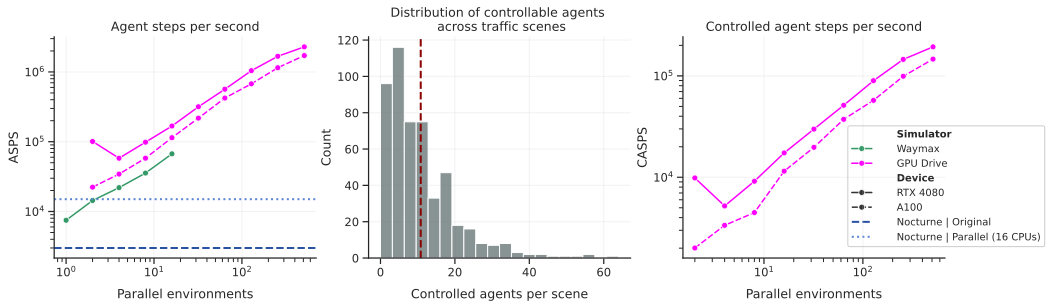

In [135]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharex=False)

axs[0].set_title(r'Agent steps per second')
sns.lineplot(data=df_all, x='batch_size (num envs)', y='all_agent_fps (throughput)', palette=[WAYMAX_COLOR, GPUDRIVE_COLOR], style='Device', hue='Simulator', marker='.', markersize=MARKERSIZE, legend=True, ax=axs[0])

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].grid(True, alpha=ALPHA)
axs[0].axhline(y=3000, color=NOCTURNE_COLOR, linestyle='--', alpha=1, label='Nocturne | Original', lw=2)
axs[0].axhline(y=15_000, color=NOCTURNE_PUFFERLIB_COLOR, linestyle='dotted', alpha=1, label='Nocturne | Parallel (16 CPUs)', lw=2)

axs[1].set_title('Distribution of controllable agents \n across traffic scenes')
sns.histplot(agent_dist, bins= 20, ax=axs[1], color='#616F70')
axs[1].grid(True, alpha=ALPHA)
# set vertical line at mean
axs[1].axvline(x=agent_dist.mean(), color='darkred', linestyle='dashed', alpha=1, lw=2)

axs[2].grid(True, alpha=ALPHA)
axs[2].set_title(r'Controlled agent steps per second')
sns.lineplot(data=df_all[df_all['Simulator'] == 'GPU Drive'], x='batch_size (num envs)', y='val_agent_fps (goodput)', palette=[GPUDRIVE_COLOR], style='Device', hue='Simulator', marker='.', markersize=MARKERSIZE, legend=False, ax=axs[2])
axs[2].set_xscale('log')
axs[2].set_yscale('log')

axs[0].set_xlabel('Parallel environments', labelpad=10)
axs[1].set_xlabel('Controlled agents per scene', labelpad=10)
axs[2].set_xlabel('Parallel environments', labelpad=10)
axs[2].set_ylabel('CASPS')
axs[0].set_ylabel('ASPS')

legend = axs[0].legend(facecolor='white', framealpha=1, fontsize=10, handletextpad=2.5, bbox_to_anchor=(3.8, 0.62))
for text in legend.get_texts():
    if text.get_text() in ["Device", "Simulator"]:
        text.set_fontweight('bold')

plt.tight_layout()
sns.despine()
plt.savefig(f'agent_distribution_and_speed_benchmark_1001.pdf', bbox_inches="tight")

### Compare between observations

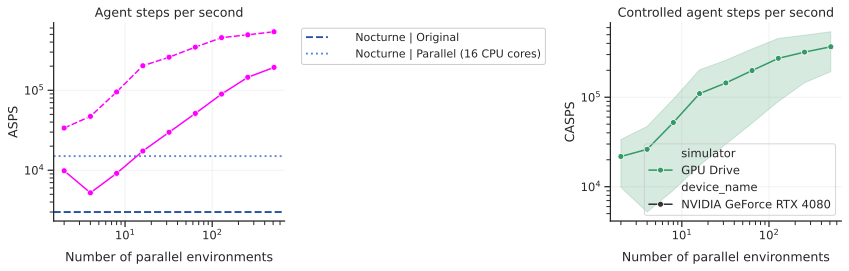

In [136]:
df_obs_types = pd.concat([df_gpudrive_speed_rtx_classic, df_gpudrive_speed_rtx_lidar])

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=False)

axs[0].axhline(y=3000, color=NOCTURNE_COLOR, linestyle='--', alpha=1, label='Nocturne | Original', lw=1.9)
axs[0].axhline(y=15_000, color=NOCTURNE_PUFFERLIB_COLOR, linestyle='dotted', alpha=1, label='Nocturne | Parallel (16 CPU cores)', lw=1.9)

axs[1].set_title(r'Controlled agent steps per second')
sns.lineplot(data=df_obs_types, x='batch_size (num envs)', palette=[GPUDRIVE_COLOR], y='val_agent_fps (goodput)', style='obs_type', hue='obs_type', marker='.', markersize=MARKERSIZE, legend=False, ax=axs[0])

axs[0].set_title(r'Agent steps per second')
sns.lineplot(data=df_obs_types, x='batch_size (num envs)', palette=[WAYMAX_COLOR, GPUDRIVE_COLOR], y='val_agent_fps (goodput)', style='device_name', hue='simulator', marker='.', markersize=MARKERSIZE, ax=axs[1])

axs[0].grid(True, alpha=ALPHA)
axs[1].grid(True, alpha=ALPHA)
axs[0].set_xlabel('Number of parallel environments', labelpad=10)
axs[1].set_xlabel('Number of parallel environments', labelpad=10)
axs[1].set_ylabel('CASPS')
axs[0].set_ylabel('ASPS')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

legend = axs[0].legend(facecolor='white', framealpha=1, fontsize=11, handletextpad=2.5, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    if text.get_text() in ["Device", "Simulator"]:
        text.set_fontweight('bold')

plt.tight_layout()
sns.despine()

In [138]:
df_all = pd.concat([df_waymax_speed, df_gdrive_speed])
df_all = df_all.reset_index(drop=True)
# Rename device_name to Device and simulator to Simulator
df_all = df_all.rename(columns={'device_name': 'Device', 'simulator': 'Simulator'})
df_all = df_all[df_all['batch_size (num envs)'] < 1000]

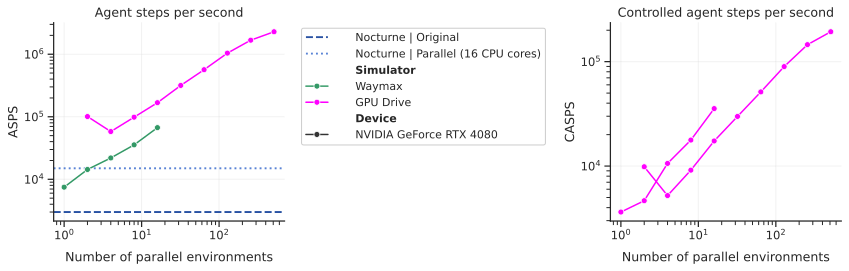

In [140]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=False)

axs[0].axhline(y=3000, color=NOCTURNE_COLOR, linestyle='--', alpha=1, label='Nocturne | Original', lw=1.9)
axs[0].axhline(y=15_000, color=NOCTURNE_PUFFERLIB_COLOR, linestyle='dotted', alpha=1, label='Nocturne | Parallel (16 CPU cores)', lw=1.9)

axs[1].set_title(r'Controlled agent steps per second')
sns.lineplot(data=df_all, x='batch_size (num envs)', palette=[GPUDRIVE_COLOR], y='val_agent_fps (goodput)', style='Device', hue='Simulator', marker='.', markersize=MARKERSIZE, legend=False, ax=axs[1])

axs[0].set_title(r'Total agent steps per second')
sns.lineplot(data=df_all, x='batch_size (num envs)', palette=[WAYMAX_COLOR, GPUDRIVE_COLOR], y='all_agent_fps (throughput)', style='Device', hue='Simulator', marker='.', markersize=MARKERSIZE, ax=axs[0])

axs[0].grid(True, alpha=ALPHA)
axs[1].grid(True, alpha=ALPHA)
axs[0].set_xlabel('Number of parallel environments', labelpad=10)
axs[1].set_xlabel('Number of parallel environments', labelpad=10)
axs[1].set_ylabel('CASPS')
axs[0].set_ylabel('ASPS')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

legend = axs[0].legend(facecolor='white', framealpha=1, fontsize=11, handletextpad=2.5, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    if text.get_text() in ["Device", "Simulator"]:
        text.set_fontweight('bold')

plt.tight_layout()
sns.despine()

plt.savefig(f'raw_sim_speed_log_log.pdf', bbox_inches="tight")

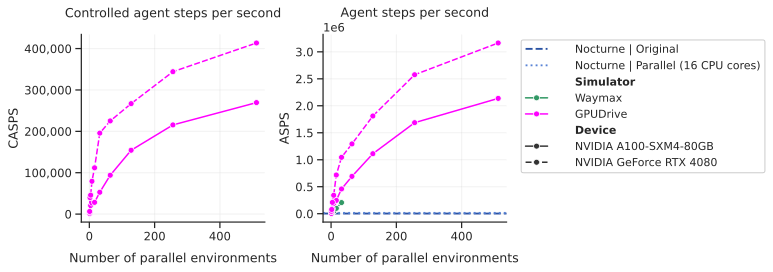

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharex=False)

axs[1].axhline(y=3000, color=NOCTURNE_COLOR, linestyle='--', alpha=1, label='Nocturne | Original', lw=1.9)
axs[1].axhline(y=15_000, color=NOCTURNE_PUFFERLIB_COLOR, linestyle='dotted', alpha=1, label='Nocturne | Parallel (16 CPU cores)', lw=1.9)

axs[0].set_title(r'Controlled agent steps per second', y=1.06)
sns.lineplot(data=df_all, x='batch_size (num envs)', palette=[GPUDRIVE_COLOR], y='cont_agent_fps', style='Device', hue='Simulator', marker='.', markersize=MARKERSIZE, legend=False, ax=axs[0])

axs[1].set_title(r'Agent steps per second')
sns.lineplot(data=df_all, x='batch_size (num envs)', palette=[WAYMAX_COLOR, GPUDRIVE_COLOR], y='val_agent_fps (goodput)', style='Device', hue='Simulator', marker='.', markersize=MARKERSIZE, ax=axs[1])

axs[0].grid(True, alpha=ALPHA)
axs[1].grid(True, alpha=ALPHA)


axs[0].set_xlabel('Number of parallel environments', labelpad=10)
axs[1].set_xlabel('Number of parallel environments', labelpad=10)
axs[0].set_ylabel('CASPS')
axs[1].set_ylabel('ASPS')


axs[0].get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

legend = axs[1].legend(facecolor='white', framealpha=1, fontsize=11, handletextpad=2.5, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    if text.get_text() in ["Device", "Simulator"]:
        text.set_fontweight('bold')

plt.tight_layout()
sns.despine()

plt.savefig(f'raw_sim_speed.pdf', bbox_inches="tight")